In [25]:
import os
import numpy as np
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import r2_score, mean_squared_error
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import f
from scipy.stats import t
from scipy.optimize import fsolve
import pandas as pd
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import statsmodels.api as sm

Лабораторная работа - 4. Вариант 10

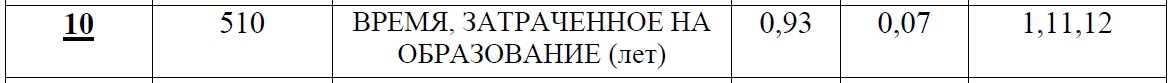

In [26]:
n = 510
gamma = 0.93
alpha = 0.07
sex = 1
a = 11
b = 12
Z = "ОБРАЗОВАНИЕ"

Оценивание и верификация моделей линейной регрессии.

Часть 1

In [27]:
path = r"C:\Users\Alex\Desktop\Моя папка\Универ\Стат.анализ, 5 семестр\lab_4\LAB_4_DATA_2024.xlsx"
doc=pd.read_excel(path, sheet_name='ДАННЫЕ')
doc = doc.iloc[:n]
print(doc.shape)
display(doc)

(510, 7)


,СТАЖ,ОБРАЗОВАНИЕ,ПОЛ,ЗП,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,22.384615,12,0,53.410000,NaN,NaN,NaN
1,8.903846,12,0,8.000000,NaN,NaN,NaN
2,13.250000,15,0,24.000000,NaN,NaN,NaN
3,18.250000,13,0,29.500000,NaN,NaN,16.928884
4,13.769231,18,0,32.049999,NaN,NaN,NaN
...,...,...,...,...,...,...,...
505,17.557692,17,1,48.070000,NaN,NaN,NaN
506,18.942308,12,1,11.500000,NaN,NaN,NaN
507,17.442308,12,1,9.250000,NaN,NaN,NaN
508,22.134615,13,1,23.000000,NaN,NaN,NaN


№1

In [28]:
salary_mean = np.mean(doc["ЗП"])
print("Средняя зарплата: ", salary_mean)
edu_mean = np.mean(doc[Z])
print("Среднее число лет обучения: ", edu_mean)

Средняя зарплата:  19.873529417374705
Среднее число лет обучения:  13.688235294117646


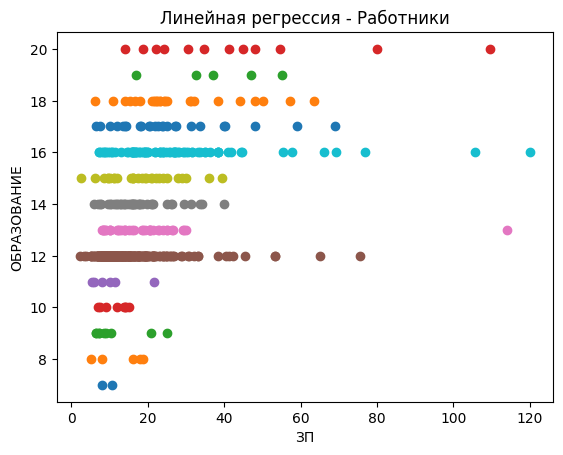

In [29]:
axes = plt.axes()        
plt.title('Линейная регрессия - Работники')
edu_lable=Z
x_lable='ЗП'
axes.set_xlabel(x_lable)
axes.set_ylabel(edu_lable)
for c, rows in doc.groupby(Z):
    plt.scatter(rows[x_lable], rows[edu_lable])
plt.show()

In [30]:
edu_values = doc[Z].values
edu = edu_values.reshape((-1, 1))
salary = doc["ЗП"].values
#print(f"{Z}: ", edu)
#print("ЗП: ", salary_values)

In [31]:
model = LinearRegression()
model.fit(edu, salary)

LinearRegression()

In [32]:
b_0_hat = model.intercept_
print('Intercept: ', b_0_hat)
b_1_hat = model.coef_
print('Slope: ', b_1_hat)

Intercept:  -14.164607890437054
Slope:  [2.48667097]


№2

In [33]:
#Нулевая гипотеза 
#H0: модель не объясняет зависимость
#Альтернативная гипотеза 
#H1: модель объясняет зависимость
R2 = model.score(edu, salary)
print(f'Коэффициент детерминации модели ({Z}, ЗП): ', R2)
k = 1 #количество факторов
F = (R2 / k) / ((1 - R2) / (n - k - 1))
F_crit = f.ppf(1 - alpha, dfn=k, dfd=(n - k - 1))
p_value = f.sf(F, dfn=k, dfd=n - k - 1)
print(f"F-статистика: {F:.4f}")
print(f"Критическое значение F: {F_crit:.4f}")
print(f"p-значение: {p_value:.4f}")
if F > F_crit:
    print("Отвергаем нулевую гипотезу: модель обладает высокой объясняющей способностью.")
else:
    print("Не отвергаем нулевую гипотезу: модель низкого качества.")

Коэффициент детерминации модели (ОБРАЗОВАНИЕ, ЗП):  0.17492466929764428
F-статистика: 107.7014
Критическое значение F: 3.2969
p-значение: 0.0000
Отвергаем нулевую гипотезу: модель обладает высокой объясняющей способностью.


In [34]:
# Проверка на совпадение предсказанных вручную и при помощи метода значений 
y_hat = b_0_hat + b_1_hat * edu
y_hat =y_hat.reshape(-1)
y_predict = model.predict(edu)
print(y_hat == y_predict)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

№3

In [35]:
x_lable = ['СТАЖ', Z]
X2 = doc[x_lable].values
y = doc['ЗП'].values
X_1 = doc['СТАЖ'].values
X_2 = doc[Z].values
new_model = LinearRegression()
new_model.fit(X2, y)
b_0_hat = new_model.intercept_
print('intercept:', b_0_hat) # b₀^
b_12_hat = new_model.coef_
print('slope:', b_12_hat) # b₁^

intercept: -27.45608429499999
slope: [0.59327618 2.72395305]


№4

In [36]:
print(f"При увеличении стажа работы на 1 год зарплата увеличится в среднем на {b_12_hat[1]:.2f} тыс. рублей.")

При увеличении стажа работы на 1 год зарплата увеличится в среднем на 2.72 тыс. рублей.


№5

In [37]:
print(f"При увеличении количества лет обучения на 1 год зарплата увеличится в среднем на {b_12_hat[0]:.2f} тыс. рублей.")

При увеличении количества лет обучения на 1 год зарплата увеличится в среднем на 0.59 тыс. рублей.


№6

In [38]:
X = []
for i in range(doc.shape[0]):
    element = [doc['СТАЖ'][i], doc[Z][i]]
    X.append(element)
X = np.array(X)

In [39]:
R2 = r2_score(salary, new_model.predict(X))
print(f'Коэффициент детерминации модели ({Z}, ЗП): ', R2)
k = 2 #количество факторов
F = (R2 / k) / ((1 - R2) / (n - k - 1))
F_crit = f.ppf(1 - alpha, dfn=k, dfd=(n - k - 1))
p_value = f.sf(F, dfn=k, dfd=n - k - 1)
print(f"F-статистика: {F:.4f}")
print(f"Критическое значение F: {F_crit:.4f}")
print(f"p-значение: {p_value:.4f}")
if F > F_crit:
    print("Отвергаем нулевую гипотезу: модель обладает высокой объясняющей способностью.")
else:
    print("Не отвергаем нулевую гипотезу: модель низкого качества.")

Коэффициент детерминации модели (ОБРАЗОВАНИЕ, ЗП):  0.20500321147463252
F-статистика: 65.3692
Критическое значение F: 2.6733
p-значение: 0.0000
Отвергаем нулевую гипотезу: модель обладает высокой объясняющей способностью.


№7

In [40]:
X = sm.add_constant(X)
model = sm.OLS(salary, X).fit()
beta = model.params
se = model.bse

n = X.shape[0]
df = n - X.shape[1]

t_crit = t.ppf(1 - alpha / 2, df)

conf_intervals = [(beta[i] - t_crit * se[i], beta[i] + t_crit * se[i]) for i in range(len(beta))]

print("Коэффициенты и их доверительные интервалы:")
for i, (coef, ci) in enumerate(zip(beta, conf_intervals)):
    if i == 0:
        print(f"Свободный член: {coef:.4f}, ДИ: [{ci[0]:.4f}, {ci[1]:.4f}]")
    else:
        print(f"Коэффициенты: {coef:.4f}, ДИ: [{ci[0]:.4f}, {ci[1]:.4f}]")

Коэффициенты и их доверительные интервалы:
Свободный член: -27.4561, ДИ: [-35.5629, -19.3493]
Коэффициенты: 0.5933, ДИ: [0.3473, 0.8392]
Коэффициенты: 2.7240, ДИ: [2.2853, 3.1626]


Часть 2

№1

In [41]:
X = []
for i in range(doc.shape[0]):
    element = [doc['СТАЖ'][i], doc[Z][i], doc['ПОЛ'][i]]
    X.append(element)
X = np.array(X)
X = sm.add_constant(X)
sp_model = LinearRegression()
sp_model.fit(X, salary)

b_0_hat = sp_model.intercept_
print('Свободный член: ', b_0_hat) # b₀^
b_12_hat = sp_model.coef_
print('Коэффициенты: ', b_12_hat[0], b_12_hat[1], b_12_hat[2], b_12_hat[3]) # b₁^

Свободный член:  -20.889682154609588
Коэффициенты:  0.0 0.4331026222373574 2.642702416360628 -5.82816293787296


№2

In [42]:
Y_pred = sp_model.predict(X)
R2 = sp_model.score(X, salary)
n = X.shape[0]
k = X.shape[1]
F = (R2 / k) / ((1 - R2) / (n - k - 1))

p_value = 1 - f.cdf(F, k, n - k - 1)

# Вывод результатов
print(f"Коэффициент детерминации R^2: {R2:.4f}")
print(f"F-статистика: {F:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: модель обладает высокой объясняющей способностью.")
else:
    print("Не отвергаем нулевую гипотезу: модель низкого качества.")

Коэффициент детерминации R^2: 0.2420
F-статистика: 40.3159
p-значение: 0.0000
Отвергаем нулевую гипотезу: модель обладает высокой объясняющей способностью.


№3

In [43]:
residuals = salary - Y_pred

mse = mean_squared_error(salary, Y_pred)

coefficients = sp_model.coef_

beta_gender = coefficients[3]

X_gender = X[:, 2]
X_gender_mean = np.mean(X_gender)
S_xx = np.sum((X_gender - X_gender_mean) ** 2)

SE_gender = np.sqrt(mse / S_xx)

t_stat = beta_gender / SE_gender

p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=X.shape[0] - 3))

print(f"Коэффициент для переменной 'пол': {beta_gender:.4f}")
print(f"t-статистика для коэффициента 'пол': {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")
if p_value < alpha:
    print(f"Различия в зарплатах мужчин и женщин статистически значимы")
else:
    print(f"Различия в зарплатах мужчин и женщин НЕ статистически значимы")

Коэффициент для переменной 'пол': -5.8282
t-статистика для коэффициента 'пол': -25.4274
p-значение: 0.0000
Различия в зарплатах мужчин и женщин статистически значимы


№4

In [49]:
mse = mean_squared_error(salary, Y_pred)

coefficients = sp_model.coef_

beta_stazh = coefficients[1]

X_stazh = X[:, 1]
X_stazh_mean = np.mean(X_stazh)
S_xx_stazh = np.sum((X_stazh - X_stazh_mean) ** 2)

SE_stazh = np.sqrt(mse / S_xx_stazh)

t_stat_stazh = beta_stazh / SE_stazh

p_value_stazh = 2 * (1 - t.cdf(np.abs(t_stat_stazh), df=X.shape[0] - 3))  # df = n - k - 1

print(f"Коэффициент для переменной 'СТАЖ': {beta_stazh:.4f}")
print(f"t-статистика для коэффициента 'СТАЖ': {t_stat_stazh:.4f}")
print(f"p-значение: {p_value_stazh:.4f}")

if p_value_stazh < alpha:
    print(f"Коэффициент при СТАЖЕ РАБОТЫ статистически значим на уровне значимости {alpha}.")
else:
    print(f"Коэффициент при СТАЖЕ РАБОТЫ НЕ статистически значим на уровне значимости {alpha}.")

Коэффициент для переменной 'СТАЖ': 0.4331
t-статистика для коэффициента 'СТАЖ': 3.3709
p-значение: 0.0008
Коэффициент при СТАЖЕ РАБОТЫ статистически значим на уровне значимости 0.07.


№5

In [45]:
beta_education = coefficients[1]

X_education = X[:, 1]
X_education_mean = np.mean(X_education)
S_xx_education = np.sum((X_education - X_education_mean) ** 2)

SE_education = np.sqrt(mse / S_xx_education)

t_stat_education = beta_education / SE_education

p_value_education = 2 * (1 - t.cdf(np.abs(t_stat_education), df=X.shape[0] - 3))  # df = n - k - 1

print(f"Коэффициент для переменной 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ': {beta_education:.4f}")
print(f"t-статистика для коэффициента 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ': {t_stat_education:.4f}")
print(f"p-значение: {p_value_education:.4f}")

if p_value_education < alpha:
    print(f"Коэффициент при ВРЕМЕНИ, ЗАТРАЧЕННОМ НА ОБРАЗОВАНИЕ статистически значим на уровне значимости {alpha}.")
else:
    print(f"Коэффициент при ВРЕМЕНИ, ЗАТРАЧЕННОМ НА ОБРАЗОВАНИЕ НЕ статистически значим на уровне значимости {alpha}.")

Коэффициент для переменной 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ': 0.4331
t-статистика для коэффициента 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ': 3.3700
p-значение: 0.0008
Коэффициент при ВРЕМЕНИ, ЗАТРАЧЕННОМ НА ОБРАЗОВАНИЕ статистически значим на уровне значимости 0.07.


№6

In [46]:
new_X = X[0]
new_X[1] = a
new_X[2] = b
new_X[3] = sex
print(new_X)

[ 1. 11. 12.  1.]


In [47]:
new_data = np.array([[1.0, a, b, sex]])

predicted_salary = sp_model.predict(new_data)[0]

# Стандартная ошибка прогноза
# Используем формулу для стандартной ошибки прогноза
# Для простоты расчетов принимаем, что остатки (ошибки) нормально распределены
predictions = sp_model.predict(X)
residuals = salary - predictions
mse = np.mean(residuals**2)  # Среднеквадратическая ошибка

X_new = np.hstack([np.ones((X.shape[0], 1)), X])
new_data_with_intercept = np.hstack([np.ones((1, 1)), new_data])

# Используем псевдообратную матрицу вместо обычной инверсии
inv_XTX = np.linalg.pinv(np.dot(X_new.T, X_new))
standard_error = np.sqrt(mse * (new_data_with_intercept @ inv_XTX @ new_data_with_intercept.T))

t_value = t.ppf(1 - alpha / 2, df=len(X) - X.shape[1] - 1)
interval_radius = t_value * standard_error

lower_bound = predicted_salary - interval_radius
upper_bound = predicted_salary + interval_radius

print(f"Прогнозная зарплата: {predicted_salary:.2f} долларов в час")
print(f"Доверительный интервал: ({lower_bound[0][0]:.2f}, {upper_bound[0][0]:.2f}) долларов в час")

Прогнозная зарплата: 9.76 долларов в час
Доверительный интервал: (7.62, 11.90) долларов в час


№7

In [48]:
beta_1 = sp_model.coef_[1]
delta_salary = beta_1 * 2
print(f"В среднем зарплата изменится на {delta_salary} долларовых в час")

В среднем зарплата изменится на 0.8662052444747148 долларовых в час


№8

Можно.